# Eda - Matheus Miranda Brandão

## Importando as bibliotecas necessárias

In [1]:

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("crest", as_cmap=True)
sns.set(style='darkgrid')
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})

from tqdm import tqdm
tqdm.pandas(desc="my bar!")

## Tables

Carregando o banco de dados, já tratado anteriormente

In [2]:
df = pd.read_pickle('../../datasets/processed/movies.pkl')
df.head()

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin
0,Avatar: The Way of Water,8.0,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,$350000000,681081686,United States
1,Guillermo del Toro's Pinocchio,7.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,$35000000,71614,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,$85900000,239268602,"Japan, United States"
3,The Banshees of Inisherin,8.0,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,19720823,"Ireland, United Kingdom, United States"
4,M3gan,6.7,2022,January,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,Unknown,90776006,United States


Observando como os dados numericos se comportam.

Budget não incluso, pois tem diferentes tipos de moedas.

In [3]:
df.describe()

,rating,year,runtime,income_dollar
count,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,6.667650,2012.500000,113.214500,1.807404e+08
std,0.912576,5.767723,19.598075,2.645420e+08
min,1.900000,2003.000000,50.000000,3.050000e+02
25%,6.175000,2007.750000,99.000000,2.931354e+07
50%,6.700000,2012.500000,110.000000,9.077601e+07
75%,7.300000,2017.250000,124.000000,2.081357e+08
max,9.600000,2022.000000,242.000000,2.922918e+09


Observando os dados categóricos.

In [4]:
df.describe(exclude=['float64', 'uint16', 'uint32', 'uint8'])

,title,month,certificate,directors,stars,genre,filming_location,budget,country_of_origin
count,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,1989,12,11,1082,1990,244,97,305,406
top,The Hunt,November,R,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...","Action, Adventure, Sci-Fi",USA,Unknown,United States
freq,2,262,901,13,2,92,906,306,942


### Observando um pouco os valores pertencentes as colunas de strings

In [5]:
def list_of_str(array: np.ndarray) -> pd.DataFrame:
    new_df = pd.Series(np.sum((array) + ',').split(',')).str.strip()
    test = new_df.copy()
    new_df = pd.DataFrame(list(set(new_df)), columns=[array.name])
    new_df.drop(index=new_df[new_df[array.name] == ''].index, inplace=True)
    new_df.reset_index(drop=True, inplace=True)
    new_df['frequency'] = [test.str.fullmatch(item).sum() for item in tqdm(new_df[array.name].values)]
    
    return new_df

In [6]:
list_of_directors = list_of_str(df.directors)

100%|██████████| 1151/1151 [00:00<00:00, 1289.18it/s]


In [7]:
list_of_directors.sort_values('frequency', ascending=False).head(10)

,directors,frequency
70,Ridley Scott,13
547,Steven Spielberg,12
900,Antoine Fuqua,11
1082,Clint Eastwood,10
840,Shawn Levy,10
1124,Michael Bay,10
456,Guy Ritchie,9
1129,Zack Snyder,9
459,Robert Rodriguez,9
426,Tim Burton,9


In [8]:
list_of_directors.sort_values('frequency', ascending=True).head(10)

,directors,frequency
0,Adam Green,1
670,Christophe Gans,1
671,Joe Dante,1
672,Gareth Evans,1
677,Naoko Yamada,1
680,Vincent Gallo,1
682,Steven Caple Jr,1
684,Griffin Dunne,1
685,Julius Onah,1
686,Allen Hughes,1


In [9]:
list_of_stars = list_of_str(df.stars)

100%|██████████| 3502/3502 [00:08<00:00, 401.89it/s]


In [10]:
list_of_stars.sort_values('frequency', ascending=False).head(10)

,stars,frequency
2858,Dwayne Johnson,25
2553,Mark Wahlberg,24
3350,Ryan Reynolds,23
2177,Amy Adams,22
551,Brad Pitt,22
3311,Matt Damon,22
559,Scarlett Johansson,22
2910,Samuel L Jackson,21
3391,Tom Hanks,21
1985,Cate Blanchett,21


In [11]:
list_of_stars.sort_values('frequency', ascending=True).head(10)

,stars,frequency
0,Nina Dobrev,1
2096,Rob Delaney,1
2097,Diego Boneta,1
2099,Adam Arkin,1
2102,Tony Denman,1
2103,Noel Cho,1
2104,Colson Baker,1
2105,Sharon Horgan,1
2108,Pamela Anderson,1
2109,John Sharian,1


In [12]:
list_of_genres = list_of_str(df.genre)

100%|██████████| 20/20 [00:00<00:00, 495.99it/s]


In [13]:
list_of_genres.sort_values('frequency', ascending=False).head(10)

,genre,frequency
4,Drama,968
9,Comedy,682
11,Action,656
15,Adventure,523
12,Thriller,363
19,Crime,332
13,Romance,283
7,Horror,262
5,Mystery,228
16,Sci-Fi,213


In [14]:
list_of_genres.sort_values('frequency', ascending=True).head(10)

,genre,frequency
6,Western,11
1,Musical,20
17,War,22
14,Sport,32
2,Music,44
3,History,57
18,Animation,118
8,Family,125
0,Biography,139
10,Fantasy,202


In [15]:
list_of_country_origin = list_of_str(df.country_of_origin)

100%|██████████| 63/63 [00:00<00:00, 830.50it/s]


In [16]:
list_of_country_origin.sort_values('frequency', ascending=False).head(10)

,country_of_origin,frequency
27,United States,1784
11,United Kingdom,452
16,Canada,217
0,France,181
50,Germany,177
56,China,101
43,Japan,77
24,Australia,68
31,Spain,48
7,Italy,41


In [17]:
list_of_country_origin.sort_values('frequency', ascending=True).head(10)

,country_of_origin,frequency
26,Tunisia,1
42,Bahamas,1
37,Cyprus,1
19,Philippines,1
20,Lebanon,1
10,Singapore,1
21,Serbia,1
29,Paraguay,1
38,Croatia,1
6,Uruguay,1


### Agrupando algumas colunas

In [18]:
def classification_of_runtime(x: int) -> str:
    if x < 60:
        return 'short'
    elif x < 120:
        return 'medium'
    elif x < 180:
        return 'long'
    else:
        return 'eternity'

df['time_classification'] = df.runtime.progress_apply(classification_of_runtime)

my bar!: 100%|██████████| 2000/2000 [00:00<00:00, 957712.98it/s]


In [19]:
df.groupby('time_classification').agg({
    'rating': ['mean', 'median']
})

rating       
                         mean median
time_classification                 
eternity             7.850000   7.85
long                 7.091587   7.10
medium               6.459027   6.50
short                8.500000   8.50

Ao agrupar por ano vemos a média, mediana e somatório.

In [20]:
df.groupby('year').agg({
    'rating': ['mean', 'median', 'sum'], 
    'runtime': ['mean', 'median', 'sum'],
    'income_dollar': ['mean', 'median', 'sum']
})

rating               runtime               income_dollar               \
       mean median    sum    mean median    sum          mean       median   
year                                                                         
2003  6.579   6.70  657.9  110.79  108.0  11079  1.483425e+08   90517771.0   
2004  6.746   6.80  674.6  111.03  106.0  11103  1.565439e+08  102824419.5   
2005  6.565   6.70  656.5  111.15  109.0  11115  1.414480e+08   89008395.5   
2006  6.713   6.75  671.3  112.87  108.0  11287  1.444764e+08   85695102.5   
2007  6.756   6.95  675.6  112.12  109.5  11212  1.620166e+08   90776006.0   
2008  6.596   6.70  659.6  107.73  106.0  10773  1.783801e+08  112237665.5   
2009  6.679   6.75  667.9  111.85  107.0  11185  1.872593e+08   90809326.0   
2010  6.691   6.60  669.1  108.69  107.0  10869  1.875894e+08   93954579.0   
2011  6.754   6.80  675.4  110.60  107.5  11060  1.977062e+08  130071931.5   
2012  6.675   6.75  667.5  112.58  109.0  11258  2.266304e+08  121553838.5   
2013  6.734   6.75  673.4  113.67  112.0  11367  2.132888e+08   98721049.5   
2014  6.692   6.60  669.2  113.05  109.0  11305  2.213606e+08  124898098.5   
2015  6.688   6.75  668.8  116.02  117.0  11602  2.273229e+08   91373416.5   
2016  6.762   6.85  676.2  114.25  114.5  11425  2.209106e+08  119310390.5   
2017  6.714   6.70  671.4  115.10  115.0  11510  2.276579e+08   90776006.0   
2018  6.677   6.75  667.7  117.24  118.0  11724  2.363394e+08   90776006.0   
2019  6.691   6.75  669.1  117.37  117.0  11737  2.339085e+08   90776006.0   
2020  6.326   6.50  632.6  107.80  105.5  10780  6.910270e+07   48580004.0   
2021  6.612   6.60  661.2  118.09  114.5  11809  1.161049e+08   40772055.0   
2022  6.703   6.70  670.3  122.29  118.5  12229  1.184192e+08   90776006.0   

                   
              sum  
year               
2003  14834247101  
2004  15654392307  
2005  14144800243  
2006  14447635031  
2007  16201657520  
2008  17838006391  
2009  18725925460  
2010  18758936169  
2011  19770619533  
2012  22663036621  
2013  21328875848  
2014  22136060623  
2015  22732291010  
2016  22091058256  
2017  22765791070  
2018  23633941239  
2019  23390851105  
2020   6910269535  
2021  11610487877  
2022  11841920151

Observando a moda dos dados categóricos por ano

In [21]:
df.groupby('year')[
    [
        'month', 'certificate', 
        'directors', 'filming_location', 
        'budget', 'country_of_origin'
    ]
].agg(lambda x: x.mode()[0])

,month,certificate,directors,filming_location,budget,country_of_origin
year,,,,,,
2003,November,R,"Lana Wachowski, Lilly Wachowski",USA,$60000000,United States
2004,July,R,Garry Marshall,USA,$30000000,United States
2005,December,PG-13,Catherine Hardwicke,USA,$50000000,United States
2006,November,R,Shawn Levy,USA,Unknown,United States
2007,November,R,Richard LaGravenese,USA,Unknown,United States
2008,December,PG-13,Clint Eastwood,USA,$20000000,United States
2009,December,R,Christian Alvart,USA,$30000000,United States
2010,June,R,Adam Green,USA,Unknown,United States
2011,August,R,Steven Spielberg,USA,$40000000,United States


Proporção de classificação indicativa nos filmes.

In [22]:
pd.DataFrame(zip(
    df.certificate.value_counts(), 
    df.certificate.value_counts(normalize=True)
    ), index=df.certificate.value_counts().index, columns=['count', 'percentage'])

,count,percentage
R,901,0.4505
PG-13,714,0.3570
PG,225,0.1125
Unrated,67,0.0335
TV-MA,40,0.0200
G,22,0.0110
TV-14,12,0.0060
TV-PG,9,0.0045
NC-17,6,0.0030
TV-G,3,0.0015


Proporção de locação nos filmes

In [23]:
pd.DataFrame(zip(
    df.filming_location.value_counts(), 
    df.filming_location.value_counts(normalize=True)
    ), index=df.filming_location.value_counts().index, columns=['count', 'percentage'])

,count,percentage
USA,906,0.4530
Canada,209,0.1045
UK,177,0.0885
Unknown,76,0.0380
Australia,44,0.0220
...,...,...
Guam,1,0.0005
Gabon,1,0.0005
French Polynesia,1,0.0005
Rwanda,1,0.0005


In [24]:
pd.DataFrame(zip(
    df.country_of_origin.value_counts(), 
    df.country_of_origin.value_counts(normalize=True)
    ), index=df.country_of_origin.value_counts().index, columns=['count', 'percentage'])

,count,percentage
United States,942,0.4710
"United Kingdom, United States",95,0.0475
"United States, United Kingdom",74,0.0370
"United States, Canada",73,0.0365
United Kingdom,34,0.0170
...,...,...
"United States, France, Hong Kong",1,0.0005
"France, Belgium, United States",1,0.0005
"United States, China, Spain, Japan, Germany",1,0.0005
"Canada, United States, United Kingdom",1,0.0005


Proporção da janela de lançamento de filmes

In [25]:
pd.DataFrame(zip(
    df.month.value_counts(), 
    df.month.value_counts(normalize=True)
    ), index=df.month.value_counts().index, columns=['count', 'percentage'])

,count,percentage
November,262,0.1310
December,248,0.1240
October,187,0.0935
June,166,0.0830
July,152,0.0760
September,151,0.0755
March,150,0.0750
August,149,0.0745
January,149,0.0745
May,144,0.0720


Restringimos nosso dataset onde o budget é dado em $. Para converte-lo em numérico

In [26]:
def array_to_int(array):
    return array[0]

series = df[df.budget.str.contains('[$]', regex=True)].budget.str.findall(r'\d+').apply(array_to_int).astype('int64')
df_budget = df.iloc[series.index, :].copy()
df_budget.budget = series
del series, array_to_int

Calculado o lucro bruto e relativo

In [27]:
df_budget['profit'] = df_budget.income_dollar - df_budget.budget
df_budget['proportional_profit'] = np.round(df_budget.income_dollar/df_budget.budget*100, 2)

In [28]:
df_budget.profit.describe()

count    1.623000e+03
mean     1.490781e+08
std      2.418279e+08
min     -2.092240e+08
25%      1.558425e+07
50%      6.898904e+07
75%      1.716331e+08
max      2.685918e+09
Name: profit, dtype: float64

In [29]:
def classification_of_profit(x: int) -> str:
    if x < 0:
        return 'failure'
    else:
        return 'gain'

df_budget['profit_classification'] = df_budget.profit.progress_apply(classification_of_profit)

my bar!: 100%|██████████| 1623/1623 [00:00<00:00, 698118.69it/s]


In [30]:
df_budget.profit_classification.value_counts()

gain       1379
failure     244
Name: profit_classification, dtype: int64

Observando os valores max e min

In [31]:
df_budget.query('profit == @df_budget.profit.min() | profit == @df_budget.profit.max()')

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin,time_classification,profit,proportional_profit,profit_classification
123,Zack Snyder's Justice League,8.0,2021,March,R,242,Zack Snyder,"Henry Cavill, Ben Affleck, Gal Gadot, Amy Adams","Action, Adventure, Fantasy",Iceland,300000000,90776006,United States,eternity,-209223994,30.26,failure
1300,Avatar,7.8,2009,December,PG-13,162,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,237000000,2922917914,United States,long,2685917914,1233.30,gain


In [32]:
df_budget.query('proportional_profit == @df_budget.proportional_profit.min() | proportional_profit == @df_budget.proportional_profit.max()')

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin,time_classification,profit,proportional_profit,profit_classification
11,Babylon,7.7,2022,December,R,188,Damien Chazelle,"Brad Pitt, Margot Robbie, Jean Smart, Olivia W...","Comedy, Drama, History",USA,78000000,1470,United States,eternity,-77998530,0.0,failure
1249,My Little Princess,9.6,2010,September,R,110,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,10,90776006,United States,medium,90775996,907760060.0,gain


Ordenando em relação ao lucro bruto e dps relativo.

In [33]:
df_budget.sort_values('profit', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin,time_classification,profit,proportional_profit,profit_classification
1300,Avatar,7.8,2009,December,PG-13,162,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,237000000,2922917914,United States,long,2685917914,1233.30,gain
305,Avengers: Endgame,8.4,2019,April,PG-13,181,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama",UK,356000000,2797501328,United States,eternity,2441501328,785.81,gain
714,Star Wars: Episode VII - The Force Awakens,7.8,2015,December,PG-13,138,J J Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Action, Adventure, Sci-Fi",Ireland,245000000,2069521700,United States,long,1824521700,844.70,gain
405,Avengers: Infinity War,8.4,2018,April,PG-13,149,"Anthony Russo, Joe Russo","Robert Downey Jr , Chris Hemsworth, Mark Ruffa...","Action, Adventure, Sci-Fi",UK,321000000,2048359754,United States,long,1727359754,638.12,gain
103,Spider-Man: No Way Home,8.3,2021,December,PG-13,148,Jon Watts,"Tom Holland, Zendaya, Benedict Cumberbatch, Ja...","Action, Adventure, Fantasy",Iceland,200000000,1917430023,United States,long,1717430023,958.72,gain
723,Jurassic World,6.9,2015,June,PG-13,124,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...","Action, Adventure, Sci-Fi",USA,150000000,1671537444,United States,long,1521537444,1114.36,gain
344,The Lion King,6.8,2019,July,PG,118,Jon Favreau,"Donald Glover, Beyonc , Seth Rogen, Chiwetel E...","Animation, Adventure, Drama",South Africa,260000000,1663250487,"United States, United Kingdom",medium,1403250487,639.71,gain
753,Furious 7,7.1,2015,April,PG-13,137,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...","Action, Crime, Thriller",United Arab Emirates,190000000,1515341399,"United States, China, Japan, Canada, United Ar...",long,1325341399,797.55,gain
27,Top Gun: Maverick,8.4,2022,May,PG-13,130,Joseph Kosinski,"Tom Cruise, Jennifer Connelly, Miles Teller, V...","Action, Drama",USA,170000000,1488732821,United States,long,1318732821,875.73,gain
335,Frozen II,6.8,2019,November,PG,103,"Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Josh Gad, Jonathan...","Animation, Adventure, Comedy",USA,150000000,1450026933,United States,medium,1300026933,966.68,gain


In [34]:
df_budget.sort_values('proportional_profit', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin,time_classification,profit,proportional_profit,profit_classification
1249,My Little Princess,9.6,2010,September,R,110,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,10,90776006,United States,medium,90775996,9.077601e+08,gain
1557,Paranormal Activity,6.3,2007,October,R,86,Oren Peli,"Katie Featherston, Micah Sloat, Mark Fredrichs...","Horror, Mystery",USA,15000,193355800,United States,medium,193340800,1.289039e+06,gain
477,The VelociPastor,5.0,2018,August,Unrated,75,Brendan Steere,"Greg Cohan, George Schewnzer, Janice Young, Da...","Action, Adventure, Comedy",USA,11000,90776006,"United States, China",medium,90765006,8.252364e+05,gain
94,Skinamarink,5.4,2022,January,R,100,Kyle Edward Ball,"Jaime Hill, Lucas Paul, Ross Paul, Dali Rose T...",Horror,Canada,15000,90776006,Canada,medium,90761006,6.051734e+05,gain
1549,The Man from Earth,7.9,2007,November,Unrated,87,Richard Schenkman,"David Lee Smith, Tony Todd, John Billingsley, ...","Drama, Fantasy, Mystery",USA,200000,90776006,United States,medium,90576006,4.538800e+04,gain
848,Mantus,2.1,2014,November,R,110,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Ma...","Comedy, Drama, Thriller",USA,250000,90776006,United States,medium,90526006,3.631040e+04,gain
791,Circle,6.0,2015,October,Unrated,87,"Aaron Hann, Mario Miscione","Allegra Masters, Aimee McKay, Ashley Key, Autu...","Drama, Horror, Mystery",Unknown,250000,90776006,United States,medium,90526006,3.631040e+04,gain
1193,"67th Street, New York, NY",9.0,2011,January,R,105,Enzo Zelocchi,"Enzo Zelocchi, David Man, Ladae Bond, Casey Cadag","Crime, Thriller",Unknown,300000,90776006,United States,medium,90476006,3.025867e+04,gain
771,Angels Apocalypse,8.2,2015,December,R,85,"Sean Cain, Enzo Zelocchi","Enzo Zelocchi, Jana Rochelle, Ryan C F Buckley...","Action, Fantasy, Sci-Fi",Unknown,500000,90776006,United States,medium,90276006,1.815520e+04,gain
1583,Once,7.8,2007,June,R,86,John Carney,"Glen Hansard, Mark ta Irglov , Hugh Walsh, Ger...","Drama, Music, Romance",Ireland,150000,20936722,"Ireland, United States",medium,20786722,1.395781e+04,gain


In [35]:
df_budget.sort_values('rating', ascending=False).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin,time_classification,profit,proportional_profit,profit_classification
1249,My Little Princess,9.6,2010,September,R,110,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,10,90776006,United States,medium,90775996,9.077601e+08,gain
1401,The Dark Knight,9.0,2008,July,PG-13,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama",USA,185000000,1006234167,"United States, United Kingdom",long,821234167,5.439100e+02,gain
1193,"67th Street, New York, NY",9.0,2011,January,R,105,Enzo Zelocchi,"Enzo Zelocchi, David Man, Ladae Bond, Casey Cadag","Crime, Thriller",Unknown,300000,90776006,United States,medium,90476006,3.025867e+04,gain
1903,The Lord of the Rings: The Return of the King,9.0,2003,December,PG-13,201,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...","Action, Adventure, Drama",New Zealand,94000000,1146457748,"New Zealand, United States",eternity,1052457748,1.219640e+03,gain
1200,Inception,8.8,2010,July,PG-13,148,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon Levitt, Ellio...","Action, Adventure, Sci-Fi",Canada,160000000,836848102,"United States, United Kingdom",long,676848102,5.230300e+02,gain
800,Interstellar,8.6,2014,November,PG-13,169,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Adventure, Drama, Sci-Fi",Iceland,165000000,773867216,"United States, United Kingdom, Canada",long,608867216,4.690100e+02,gain
803,Whiplash,8.5,2014,October,R,106,Damien Chazelle,"Miles Teller, J K Simmons, Melissa Benoist, Pa...","Drama, Music",USA,3300000,49396747,United States,medium,46096747,1.496870e+03,gain
308,Parasite,8.5,2019,November,R,132,Bong Joon Ho,"Song Kang ho, Lee Sun kyun, Cho Yeo jeong, Cho...","Drama, Thriller",South Korea,11400000,262676096,South Korea,long,251276096,2.304180e+03,gain
1604,The Departed,8.5,2006,October,R,151,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","Crime, Drama, Thriller",USA,90000000,291480452,"United States, Hong Kong",long,201480452,3.238700e+02,gain
45,Kantara,8.5,2022,September,R,148,Rishab Shetty,"Rishab Shetty, Kishore Kumar G , Achyuth Kumar...","Action, Adventure, Drama",Unknown,2000000,2406221,India,long,406221,1.203100e+02,gain


In [36]:
df_budget.sort_values('rating', ascending=True).head(10)

,title,rating,year,month,certificate,runtime,directors,stars,genre,filming_location,budget,income_dollar,country_of_origin,time_classification,profit,proportional_profit,profit_classification
1484,Disaster Movie,1.9,2008,August,PG-13,87,"Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...","Comedy, Sci-Fi",USA,20000000,34816824,United States,medium,14816824,174.08,gain
848,Mantus,2.1,2014,November,R,110,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Ma...","Comedy, Drama, Thriller",USA,250000,90776006,United States,medium,90526006,36310.40,gain
1780,Son of the Mask,2.2,2005,February,PG,94,Lawrence Guterman,"Jamie Kennedy, Traylor Howard, Alan Cumming, L...","Comedy, Family, Fantasy",Australia,84000000,59981548,"United States, Germany",medium,-24018452,71.41,failure
1524,Epic Movie,2.4,2007,January,PG-13,86,"Jason Friedberg, Aaron Seltzer","Kal Penn, Jennifer Coolidge, Fred Willard, Ada...","Adventure, Comedy, Fantasy",USA,20000000,87238158,United States,medium,67238158,436.19,gain
1369,Dragonball Evolution,2.6,2009,April,PG,85,James Wong,"Justin Chatwin, James Marsters, Chow Yun Fat, ...","Action, Adventure, Fantasy",Mexico,30000000,55720772,"United Kingdom, Mexico, Hong Kong, United States",medium,25720772,185.74,gain
1491,Meet the Spartans,2.8,2008,January,PG-13,87,"Jason Friedberg, Aaron Seltzer","Sean Maguire, Kevin Sorbo, Carmen Electra, Ken...","Comedy, Fantasy",USA,30000000,85897593,United States,medium,55897593,286.33,gain
331,Cats,2.8,2019,December,PG,110,Tom Hooper,"James Corden, Judi Dench, Jason Derulo, Idris ...","Comedy, Drama, Family",UK,95000000,75558925,"United Kingdom, United States, Canada, Austral...",medium,-19441075,79.54,failure
1891,Catwoman,3.4,2004,July,PG-13,104,Pitof,"Halle Berry, Sharon Stone, Benjamin Bratt, Lam...","Action, Crime, Fantasy",USA,100000000,82102379,United States,medium,-17897621,82.10,failure
348,Black Christmas,3.5,2019,December,PG-13,92,Sophia Takal,"Imogen Poots, Aleyse Shannon, Lily Donoghue, B...","Horror, Mystery, Thriller",New Zealand,5000000,18529730,"United States, New Zealand, Canada",medium,13529730,370.59,gain
1924,The Room,3.6,2003,June,R,99,Tommy Wiseau,"Tommy Wiseau, Juliette Danielle, Greg Sestero,...",Drama,USA,6000000,4988181,United States,medium,-1011819,83.14,failure


In [133]:
pd.DataFrame(df_budget.query('profit_classification == "failure" & rating >= 7').title.values, columns=['title'])

,title
0,Guillermo del Toro's Pinocchio
1,The Fabelmans
2,Babylon
3,Bones and All
4,Glass Onion: A Knives Out Mystery
...,...
64,The Fall
65,The World's Fastest Indian
66,Lords of Dogtown
67,The Life Aquatic with Steve Zissou


In [126]:
pd.DataFrame(zip(
    df_budget.query('profit_classification == "failure"').year.value_counts(sort=False), 
    df_budget.query('profit_classification == "failure" & rating >= 7').year.value_counts(sort=False)
    ), index=df_budget.query('profit_classification == "failure" & rating >= 7').year.unique(), columns=['failure', 'failure_and_positive_rating'])

,failure,failure_and_positive_rating
2022,19,8
2021,18,11
2020,15,3
2019,13,5
2018,10,1
2017,9,4
2016,11,3
2015,10,4
2014,12,2
2012,9,2


## Plots (Opcional)

### Criando algumas funções para facilitar na plotagem

In [37]:
def create_bar(df_: pd, ax_: plt.axes, x_: str, y_: str, agg_: str, title_:str, rot=45):
    df = df_.groupby(by=x_, as_index=False)[y_].agg(agg_)
    try:
        df[x_] = df[x_].str.capitalize()
    except:
        pass
    
    if x_ in 'month':
        order_ = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        sns.barplot(data=df, x=x_, y=y_, ax=ax_, order=order_, palette="crest")
    else:
        sns.barplot(data=df, x=x_, y=y_, ax=ax_, palette="crest")
    
    
    for value in ax_.containers:
        ax_.bar_label(value)
    ax_.tick_params(axis='x', labelrotation=rot, size=12)
    ax_.tick_params(axis='y', size=12)
    ax_.set_xlabel(x_.capitalize(), fontsize='large', family='monospace')
    ax_.set_ylabel(y_.capitalize(), fontsize='large', family='monospace')
    ax_.set_title(title_.title(), fontsize='large', fontweight='bold', 
            style='italic', family='monospace')

In [38]:
def create_box(df: pd, ax_: plt.axes, x_: str, y_: str, title_:str, rot=45):
    try:
        df[x_] = df[x_].str.capitalize()
    except:
        pass
    
    if x_ in 'month':
        order_ = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        sns.boxplot(data=df, x=x_, y=y_, ax=ax_, order=order_, palette="crest")
    else:
        sns.boxplot(data=df, x=x_, y=y_, ax=ax_, palette="crest")
    
    ax_.tick_params(axis='x', labelrotation=rot, size=12)
    ax_.tick_params(axis='y', size=12)
    ax_.set_xlabel(x_.capitalize(), fontsize='large', family='monospace')
    ax_.set_ylabel(y_.capitalize(), fontsize='large', family='monospace')
    ax_.set_title(title_.title(), fontsize='large', fontweight='bold', 
            style='italic', family='monospace')

In [39]:
def create_pie(df_: pd, ax_: plt.axes, x_: str, y_: str, title_: str, rot=45):
    df = df_.groupby(by=x_, as_index=False)[y_].count()
        
    ax_.pie(data=df, x=y_, labels=x_, autopct = "%1.2f%%", startangle = rot, colors = sns.color_palette('crest'))
    ax_.set_title(title_.title(), fontsize='large', fontweight='bold', 
            style='italic', family='monospace')

In [55]:
def create_scatter(df: pd, ax_: plt.axes, x_: str, y_: str, hue_: str, title_: str):
    sns.scatterplot(data=df, x=x_, y=y_, hue=hue_, size=hue_, alpha = 0.75, ax=ax_)
    ax_.set_xlabel(x_.capitalize(), fontsize='large', family='monospace')
    ax_.set_ylabel(y_.capitalize(), fontsize='large', family='monospace')
    ax_.set_title(title_.title(), fontsize='large', fontweight='bold', 
            style='italic', family='monospace')

### Plotando ...

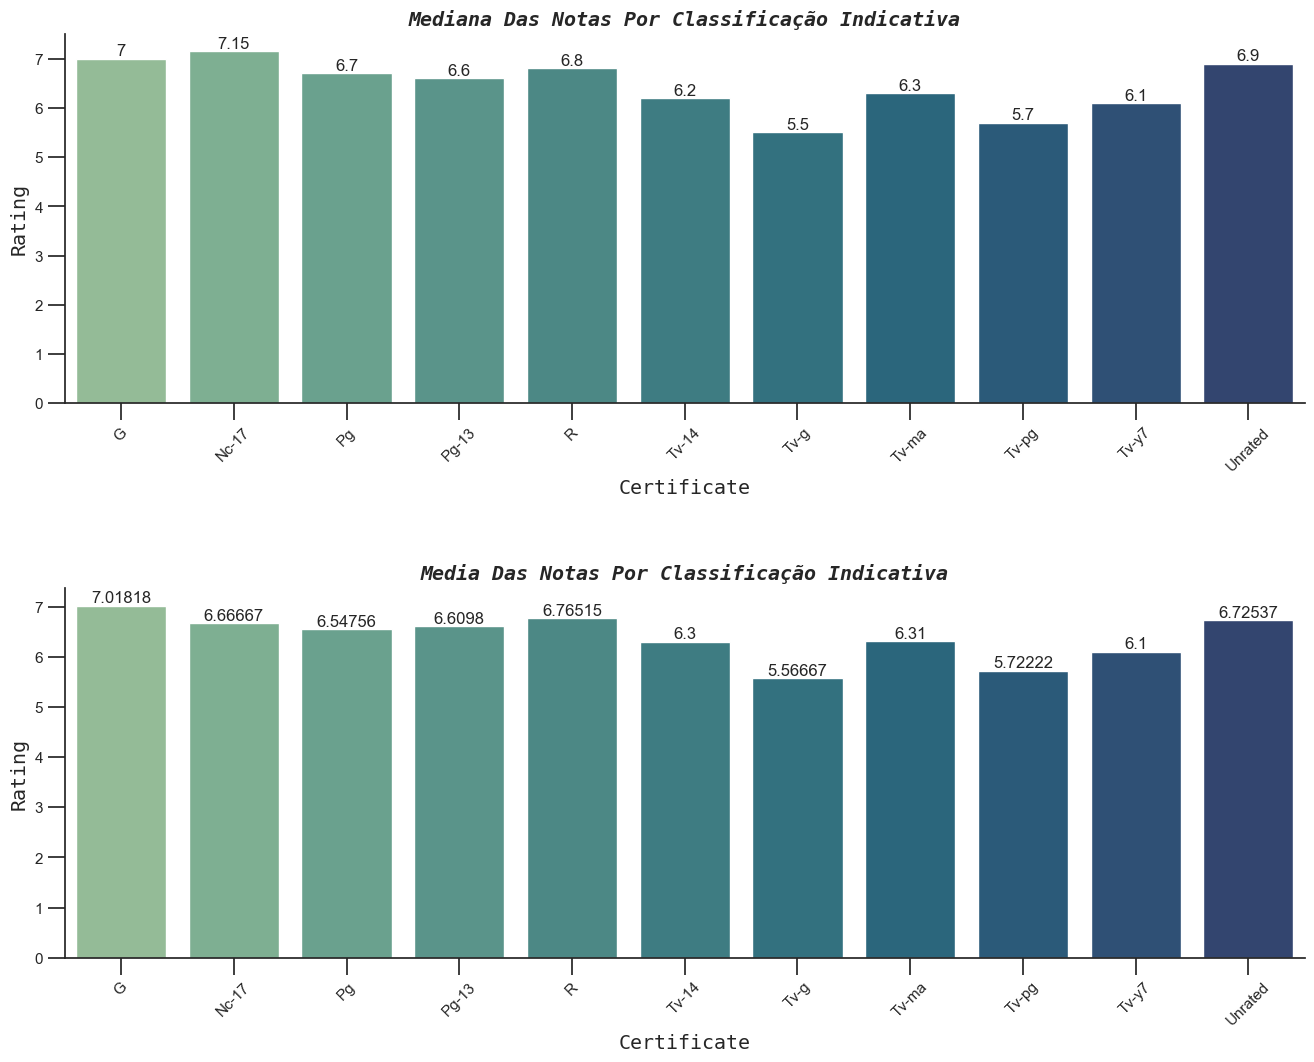

In [41]:
fig, (ax1, ax2) = plt.subplots((2), figsize=(16, 12))
create_bar(df, ax1, 'certificate', 'rating', 'median', 'Mediana das notas por classificação indicativa')
create_bar(df, ax2, 'certificate', 'rating', 'mean', 'Media das notas por classificação indicativa')
plt.subplots_adjust(hspace=.5)
plt.show()

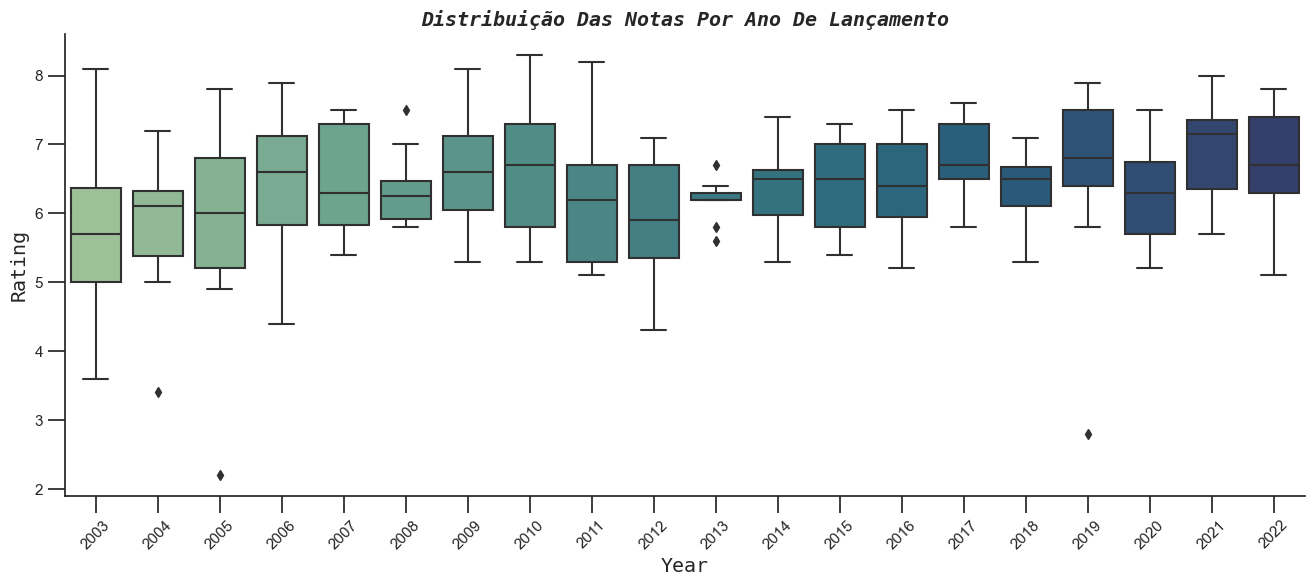

In [105]:
fig, ax = plt.subplots(figsize=(16, 6))
create_box(df_budget.query('profit_classification == "failure"'), ax, 'year', 'rating', 'Distribuição das notas por ano de lançamento')
plt.show()

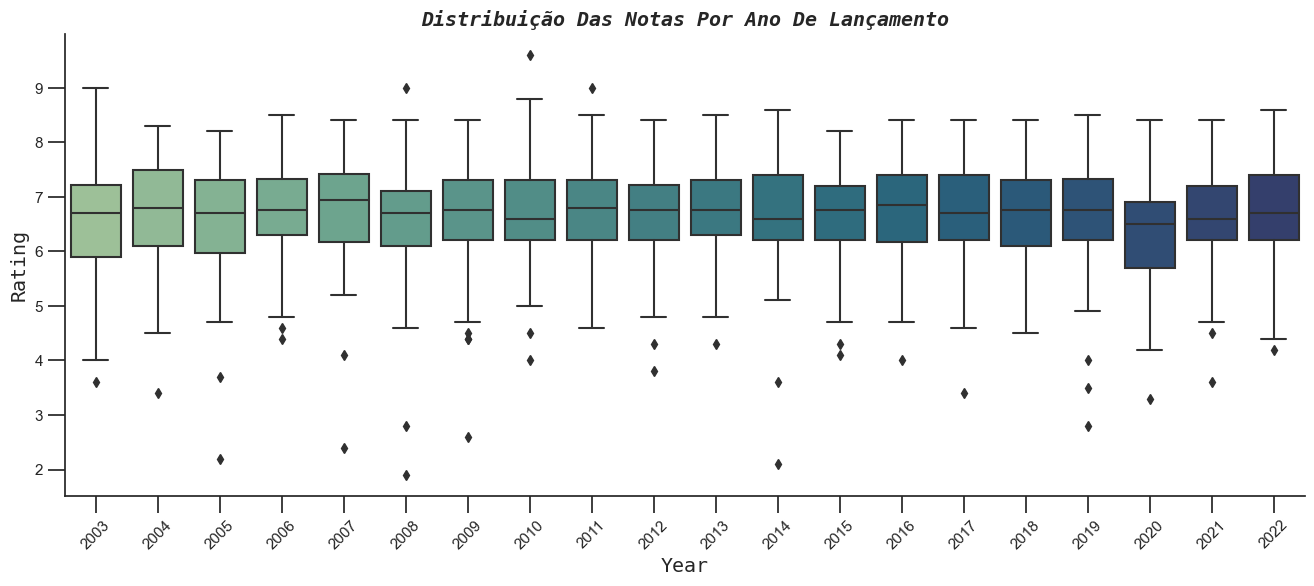

In [42]:
fig, ax = plt.subplots(figsize=(16, 6))
create_box(df, ax, 'year', 'rating', 'Distribuição das notas por ano de lançamento')
plt.show()

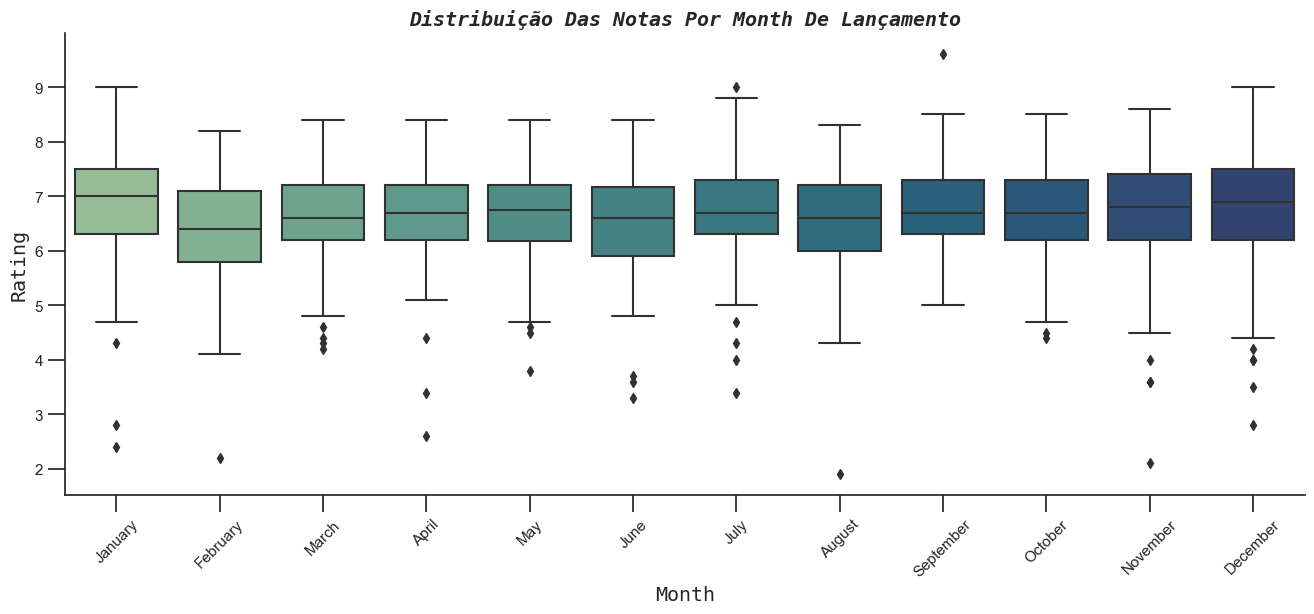

In [43]:
fig, ax = plt.subplots(figsize=(16, 6))
create_box(df, ax, 'month', 'rating', 'Distribuição das notas por month de lançamento')
plt.show()

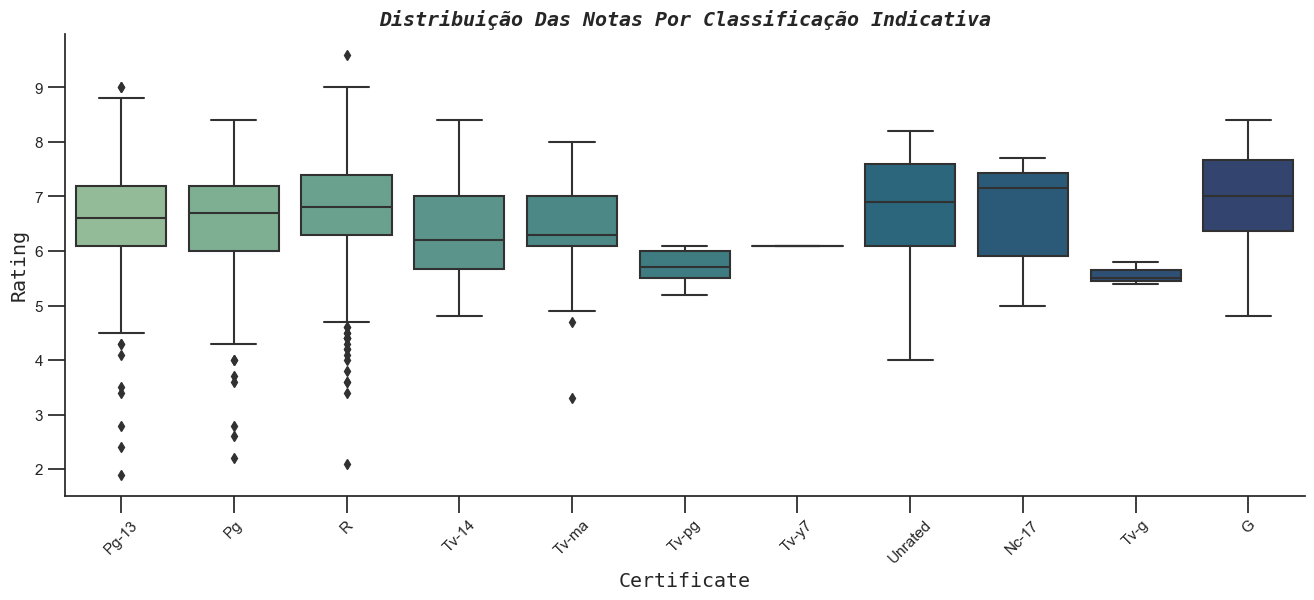

In [44]:
fig, ax = plt.subplots(figsize=(16, 6))
create_box(df, ax, 'certificate', 'rating', 'Distribuição das notas por classificação indicativa')
plt.show()

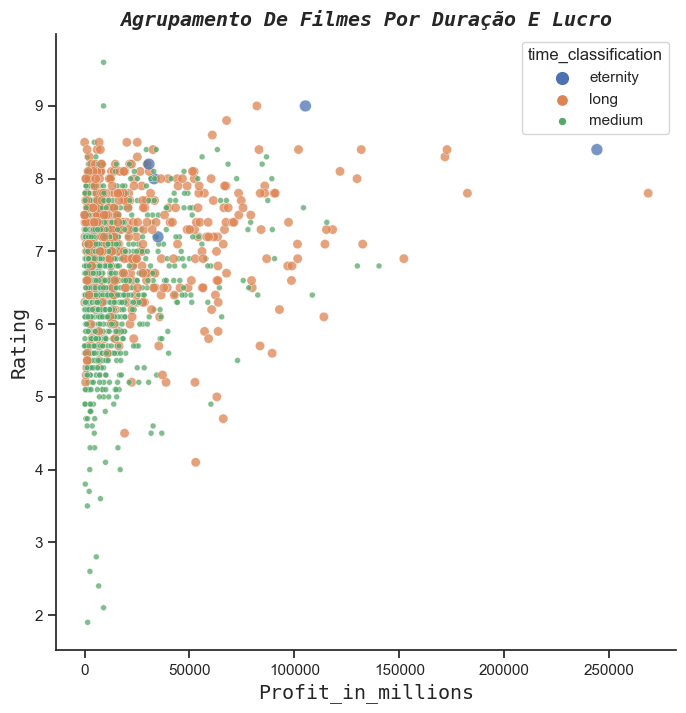

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))

df_to_scatter = df_budget.query('profit_classification == "gain"').copy()
df_to_scatter['profit_in_millions'] = df_to_scatter.profit/10_000
create_scatter(df_to_scatter, ax, 'profit_in_millions', 'rating', 'time_classification', 'Agrupamento de filmes por duração e lucro')
del df_to_scatter

plt.show()

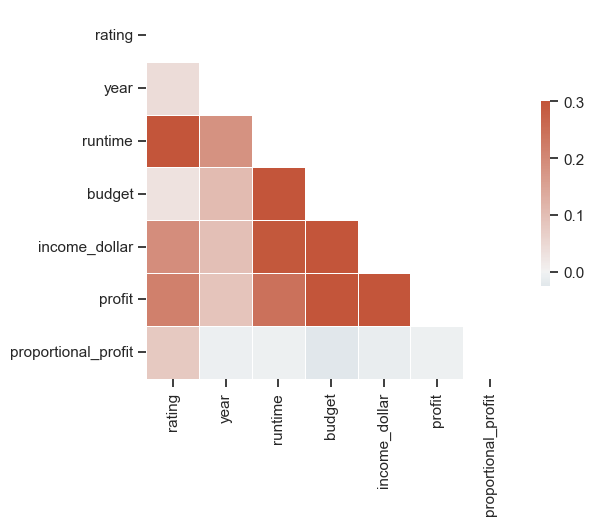

In [100]:
corr = df_budget.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()